# Term Project: Predictive Modelling for Customer Churn

**Done By:** 

| Student Name | Student ID |
|--------------|------------|
| Zahraa Fadhel | 202209444 |
| Zahraa Mohammed | 2022 |


## 1. Project Overview

Predicting customer churn—when customers stop using a company's products or services—is a high-priority business problem because retaining an existing customer is typically far less expensive than acquiring a new one. This project asks us to design, implement, and evaluate a machine learning pipeline that predicts which customers are likely to churn, using the Telco Customer Churn dataset. We will work through the full data-science lifecycle: data exploration, cleaning and preprocessing, feature engineering, model selection and training, evaluation using appropriate metrics, and interpretation of results with business-focused recommendations.


## 2. Dataset Information

We will be working with the **"Telco Customer Churn"** dataset from Kaggle, which contains information about a telecommunications company's customers and whether they churned in the last month.

**Dataset Link:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Key Features:**
- **Customer Demographics:** gender, SeniorCitizen, Partner, Dependents
- **Account Information:** tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
- **Services:** PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
- **Target Variable:** Churn (Yes/No)


## 3. Project Workflow

This notebook follows a structured approach:

1. **Data Loading and Initial Exploration**

---

*Let's begin our journey into predictive modeling for customer churn!*

# Part 1: Data Loading and Initial Exploration

In [191]:
# Load the WA_Fn-UseC_-Telco-Customer-Churn.csv dataset into a Pandas DataFrame.
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [192]:
# check data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [193]:
# Identify missing values. (There are no missing values)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [194]:
# Summarize descriptive statistics for numerical features.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


DATASET OVERVIEW BEFORE PREPROCESSING
Dataset shape: (7043, 21)
Total customers: 7,043
Churn rate: 26.5%
Missing values: 0

FEATURE DISTRIBUTION SUMMARY
Data Types:
object     18
int64       2
float64     1
Name: count, dtype: int64

Categorical Features Value Counts:

Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Numerical Features Summary:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.85

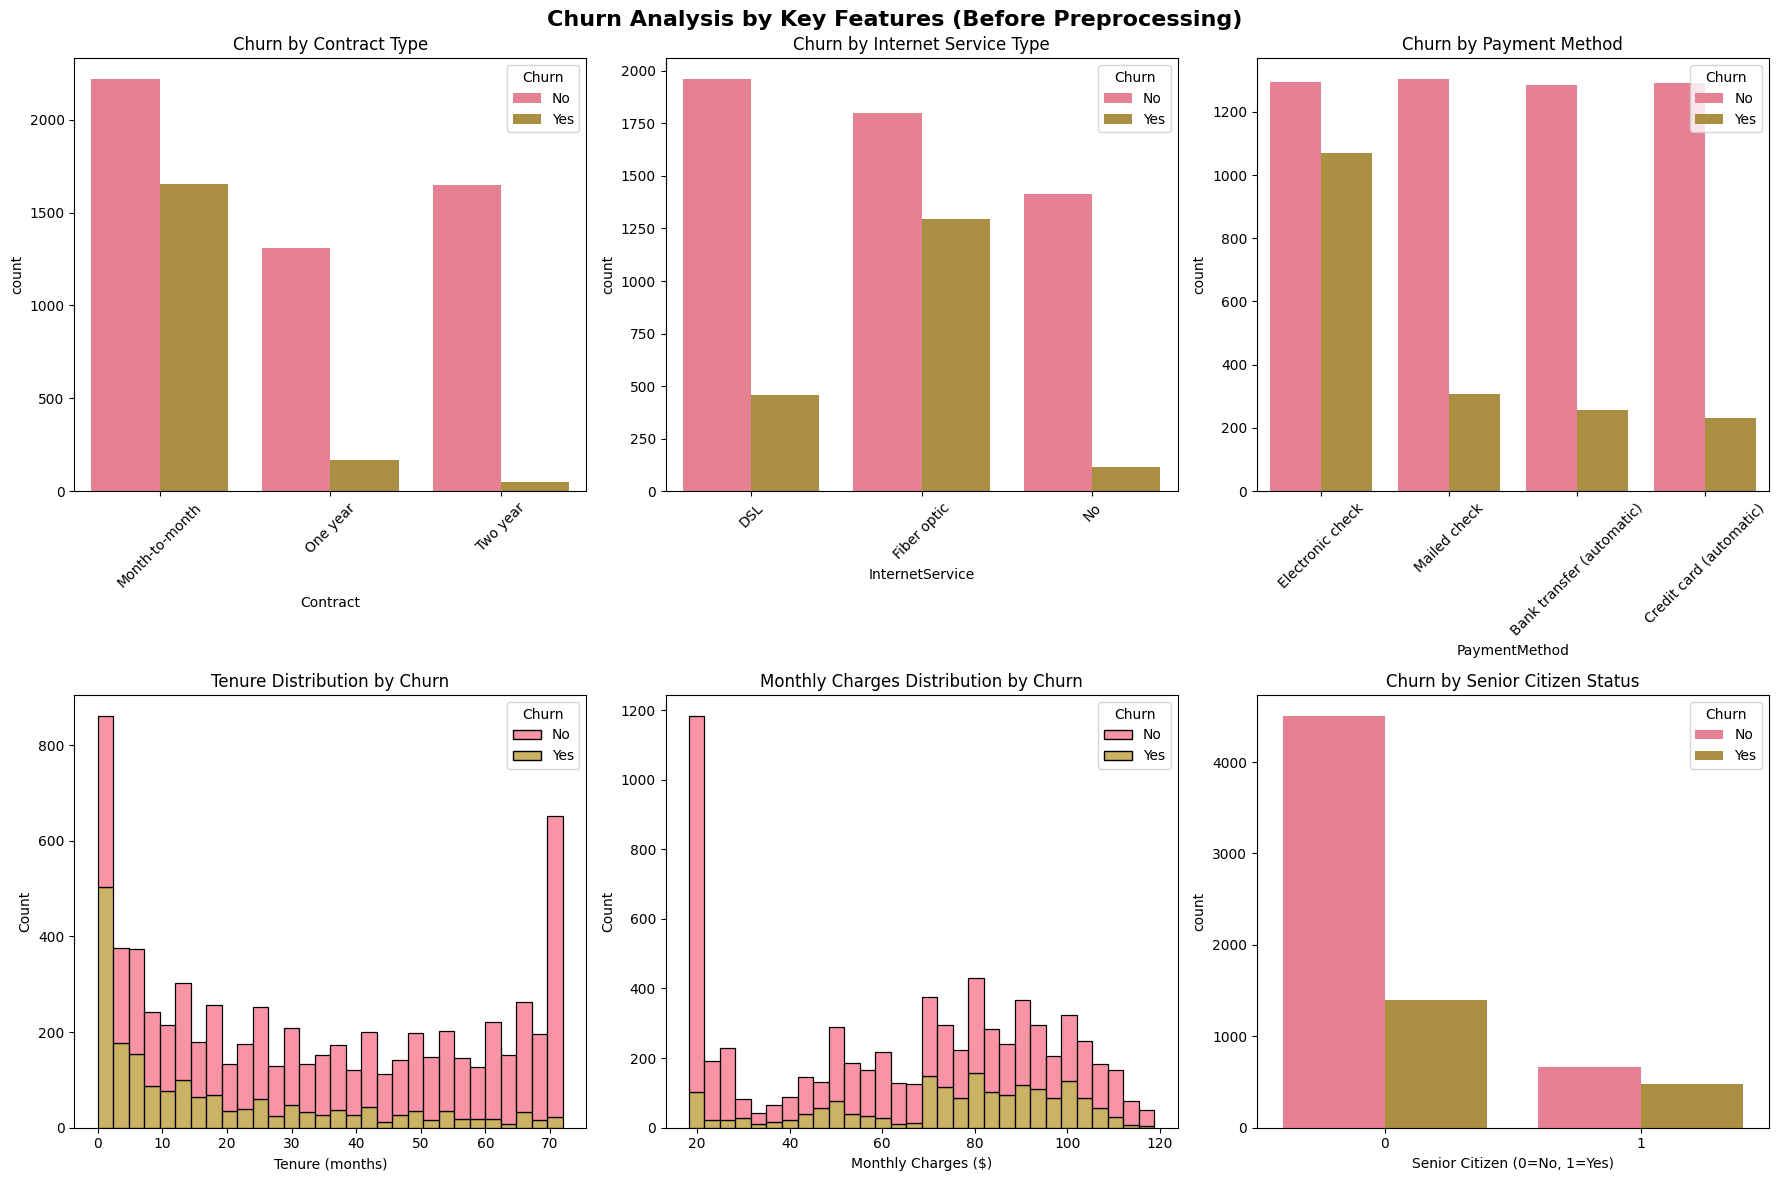


SERVICE USAGE PATTERNS


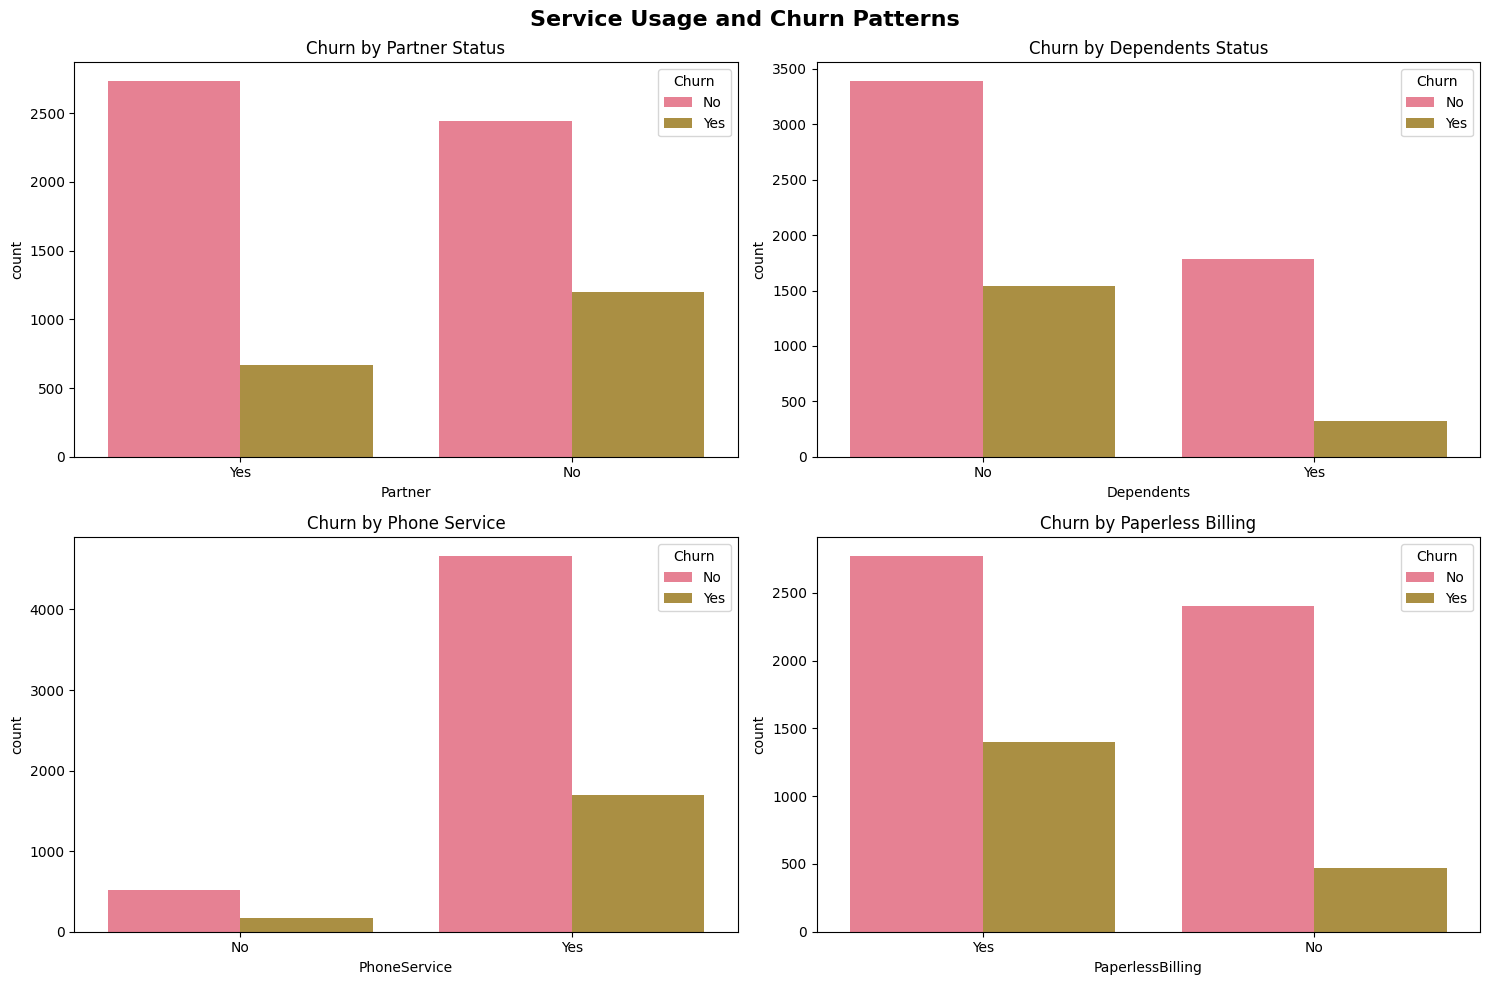


KEY INSIGHTS FROM INITIAL EDA
Overall Statistics:
  - Total customers: 7,043
  - Churned customers: 1,869
  - Overall churn rate: 26.5%

Contract Analysis:
  - Month-to-month: 42.7% churn rate
  - One year: 11.3% churn rate
  - Two year: 2.8% churn rate

Internet Service Analysis:
  - DSL: 19.0% churn rate
  - Fiber optic: 41.9% churn rate
  - No: 7.4% churn rate

Payment Method Analysis:
  - Bank transfer (automatic): 16.7% churn rate
  - Credit card (automatic): 15.2% churn rate
  - Electronic check: 45.3% churn rate
  - Mailed check: 19.1% churn rate

Tenure Analysis:
  - Short tenure (≤12 months): 47.4% churn rate
  - Long tenure (>12 months): 17.1% churn rate

Demographic Analysis:
  - Female: 26.9% churn rate
  - Male: 26.2% churn rate
  - Non-Senior Citizens: 23.6% churn rate
  - Senior Citizens: 41.7% churn rate


In [195]:
# Perform initial EDA to understand the distribution of features and their relationship with the target variable.
# Visualize key insights (e.g., churn rate by contract type, internet service, tenure).

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview (Before Preprocessing)
print("DATASET OVERVIEW BEFORE PREPROCESSING")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Total customers: {len(df):,}")
print(f"Churn rate: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.1f}%")
print(f"Missing values: {df.isnull().sum().sum()}")

# 2. Feature Distribution Analysis
print("\nFEATURE DISTRIBUTION SUMMARY")
print("="*50)

# Check data types
print("Data Types:")
print(df.dtypes.value_counts())

# Categorical features summary
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

print(f"\nCategorical Features Value Counts:")
for col in ['Contract', 'InternetService', 'PaymentMethod']:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Numerical features
numerical_cols = ['tenure', 'MonthlyCharges']
print(f"\nNumerical Features Summary:")
print(df[numerical_cols].describe())

# 3. Churn Analysis by Features
print("\nCHURN ANALYSIS BY KEY FEATURES")
print("="*50)

# Create subplots for churn analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis by Key Features (Before Preprocessing)', fontsize=16, fontweight='bold')

# Contract vs Churn
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Contract Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Internet Service Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0,2])
axes[0,2].set_title('Churn by Payment Method')
axes[0,2].tick_params(axis='x', rotation=45)

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn')
axes[1,0].set_xlabel('Tenure (months)')

# Monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges Distribution by Churn')
axes[1,1].set_xlabel('Monthly Charges ($)')

# Senior citizen vs churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1,2])
axes[1,2].set_title('Churn by Senior Citizen Status')
axes[1,2].set_xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 4. Additional Analysis - Service Usage Patterns
print("\nSERVICE USAGE PATTERNS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Service Usage and Churn Patterns', fontsize=16, fontweight='bold')

# Partner vs Churn
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Partner Status')

# Dependents vs Churn
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Dependents Status')

# Phone Service vs Churn
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Phone Service')

# Paperless Billing vs Churn
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Paperless Billing')

plt.tight_layout()
plt.show()

# 5. Key Insights Summary
print("\nKEY INSIGHTS FROM INITIAL EDA")
print("="*50)
churn_count = (df['Churn'] == 'Yes').sum()
total_customers = len(df)
churn_rate = (churn_count / total_customers) * 100

print(f"Overall Statistics:")
print(f"  - Total customers: {total_customers:,}")
print(f"  - Churned customers: {churn_count:,}")
print(f"  - Overall churn rate: {churn_rate:.1f}%")

# Contract insights
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nContract Analysis:")
for contract, rate in contract_churn.items():
    print(f"  - {contract}: {rate:.1f}% churn rate")

# Internet service insights
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nInternet Service Analysis:")
for service, rate in internet_churn.items():
    print(f"  - {service}: {rate:.1f}% churn rate")

# Payment method insights
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nPayment Method Analysis:")
for method, rate in payment_churn.items():
    print(f"  - {method}: {rate:.1f}% churn rate")

# Tenure insights
short_tenure_churn = df[df['tenure'] <= 12]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
long_tenure_churn = df[df['tenure'] > 12]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"\nTenure Analysis:")
print(f"  - Short tenure (≤12 months): {short_tenure_churn:.1f}% churn rate")
print(f"  - Long tenure (>12 months): {long_tenure_churn:.1f}% churn rate")

# Demographic insights
gender_churn = df.groupby('gender')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nDemographic Analysis:")
for gender, rate in gender_churn.items():
    print(f"  - {gender}: {rate:.1f}% churn rate")

senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"  - Non-Senior Citizens: {senior_churn[0]:.1f}% churn rate")
print(f"  - Senior Citizens: {senior_churn[1]:.1f}% churn rate")

# Part 2: Data Preprocessing and Feature Engineering

In [196]:
# No missing values found as df.isnull().sum() outputs all zeros

In [197]:
# Drop customerID because it doesn't help in predictive
df.drop('customerID', axis=1, inplace=True)

In [198]:
# convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


### Convert categorical features into numerical representations (e.g., one-hot encoding, label encoding). Explain your choices.

### It is better to store attributes with 2 values only (e.g Yes/No) to 0 representing No(False) and 1 representing Yes(True). These attributes are: SeniorCitizen, Partner, Dependents, PhoneService, Multiple Lines, OnlineSecurity, onlineBackUp, DeviceProtection, TechsSupport, StreamingTV, StreamingMovies, PaperlessBilling and the target attribute Churn 

### Why we choose 0 and 1 to represent true/false values instead of boolean ?
1. ML compatibility: All scikit-learn models work seamlessly with int features
2. Consistent numerical processing: No dtype conversion needed during model training
3. Better performance: Faster computations
4. Cleaner pipeline: No special handling required for boolean columns

In [199]:
# Convert 'Partner' to int representing boolean
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

# Convert 'Dependents' to int representing boolean
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

# Convert 'PhoneService' to int representing boolean
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

# Convert 'MultipleLines' to int representing boolean
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# Convert 'OnlineSecurity' to int representing boolean
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'OnlineBackup' to int representing boolean
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'DeviceProtection' to int representing boolean
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'TechSupport' to int representing boolean
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'StreamingTV' to int representing boolean
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'StreamingMovies' to int representing boolean
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'PaperlessBilling' to int representing boolean
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Convert 'Churn' to int representing boolean
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check data types again
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Convert categorical features into numerical representations (e.g., one-hot encoding, label encoding). Explain your choices.

### Convert gender to numerical values
#### Using Label encoding (0/1), Why? Becauaes there are only 2 categories with no no ordinal relationship

In [200]:
# Convert gender to binary encoding
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

### Convert Contract to numerical values
#### Using Ordinal encoding (0, 1, 2), Why? Becauaes there are 3 values with clear ordinal relationship as longer contracts show increasing commitment

In [201]:
# Convert Contract to ordinal encoding (commitment level)
df['Contract'] = df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1, 
    'Two year': 2
})

### Convert PaymentMethod to numerical values
#### Using One-hot encoding, Why? Becauaes there are 4 categories with no ordinal relationship, so we need to avoid artificial ordering

In [202]:
# One-hot encode PaymentMethod
# converts 'PaymentMethod' col into multiple binary (0/1) columns — one for each unique category with prefix 'Payment'
payment_dummies = pd.get_dummies(df['PaymentMethod'], prefix='Payment').astype(int)
df = pd.concat([df, payment_dummies], axis=1)
df.drop('PaymentMethod', axis=1, inplace=True) # remove original column

### Convert InternetService to numerical values
#### Using One-hot encoding, Why? Becauaes there are 3 categories representing different service types and no clear ordering

In [203]:
# One-hot encode InternetService
# converts 'InternetService' col into multiple binary (0/1) columns — one for each unique category with prefix 'Internet'
internet_dummies = pd.get_dummies(df['InternetService'], prefix='Internet').astype(int)
df = pd.concat([df, internet_dummies], axis=1)
df.drop('InternetService', axis=1, inplace=True) # remove original column

In [204]:
# Get cols
cols = df.columns.tolist()
print("Current columns:")
print(cols)

# Uniform column names to snake_case
column_mapping = {
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'Contract': 'contract',
    'Churn': 'churn',
    'Payment_Bank transfer (automatic)': 'payment_bank_transfer',
    'Payment_Credit card (automatic)': 'payment_credit_card',
    'Payment_Electronic check': 'payment_electronic_check',
    'Payment_Mailed check': 'payment_mailed_check',
    'Internet_DSL': 'internet_dsl',
    'Internet_Fiber optic': 'internet_fiber_optic',
    'Internet_No': 'internet_no'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

# reinsert 'chrun' at the end if needed
df['churn'] = df.pop('churn')

print(f"\nUniform columns ({len(df.columns)} total):")
print(df.columns.tolist())


Current columns:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)', 'Payment_Electronic check', 'Payment_Mailed check', 'Internet_DSL', 'Internet_Fiber optic', 'Internet_No']

Uniform columns (25 total):
['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'monthly_charges', 'total_charges', 'payment_bank_transfer', 'payment_credit_card', 'payment_electronic_check', 'payment_mailed_check', 'internet_dsl', 'internet_fiber_optic', 'internet_no', 'churn']


#### We noticed we have 'Internet_No' which we'll be using to determine if customer has customer or not. Internet_No = 1 means the customer has NO internet service. Internet_DSL = 1 means the customer has DSL. Internet_Fiber optic = 1 means the customer has Fiber optic.

In [205]:
# datatypes after preprocessingp
df.dtypes

gender                        int64
senior_citizen                int64
partner                       int64
dependents                    int64
tenure                        int64
phone_service                 int64
multiple_lines                int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract                      int64
paperless_billing             int64
monthly_charges             float64
total_charges               float64
payment_bank_transfer         int64
payment_credit_card           int64
payment_electronic_check      int64
payment_mailed_check          int64
internet_dsl                  int64
internet_fiber_optic          int64
internet_no                   int64
churn                         int64
dtype: object

In [206]:
# first few cols after preprocessing
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,payment_bank_transfer,payment_credit_card,payment_electronic_check,payment_mailed_check,internet_dsl,internet_fiber_optic,internet_no,churn
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,1,0,1,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,0,0,0,1,1,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,1,0,0,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,0,0,1,0,0,1,0,1


### Scale numerical features to ensure no single feature dominates the model training.

In [207]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features that need scaling
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display statistics after scaling
print("Numerical Features After Scaling:")
print("="*50)
print(df[numerical_features].describe().round(3))

print(f"\n** Mean of scaled features should be ~0, std should be ~1 **")

# Verify scaling
print("\nVerification:")
for col in numerical_features:
    print(f"{col}: mean={df[col].mean():.4f}, std={df[col].std():.4f}")

# Display first few rows to see scaled values 
print("\nFirst 5 rows of scaled features:")
print(df[numerical_features].head())

Numerical Features After Scaling:
         tenure  monthly_charges  total_charges
count  7043.000         7043.000       7032.000
mean     -0.000           -0.000          0.000
std       1.000            1.000          1.000
min      -1.318           -1.546         -0.999
25%      -0.952           -0.973         -0.830
50%      -0.137            0.186         -0.391
75%       0.921            0.834          0.667
max       1.614            1.794          2.824

** Mean of scaled features should be ~0, std should be ~1 **

Verification:
tenure: mean=-0.0000, std=1.0001
monthly_charges: mean=-0.0000, std=1.0001
total_charges: mean=0.0000, std=1.0001

First 5 rows of scaled features:
     tenure  monthly_charges  total_charges
0 -1.277445        -1.160323      -0.994194
1  0.066327        -0.259629      -0.173740
2 -1.236724        -0.362660      -0.959649
3  0.514251        -0.746535      -0.195248
4 -1.236724         0.197365      -0.940457


DATASET OVERVIEW AFTER PREPROCESSING
Dataset shape: (7043, 25)
Total customers: 7,043
Churn rate: 26.5%
Missing values: 11

FEATURE DISTRIBUTION SUMMARY
Continuous Features:
        tenure  monthly_charges  total_charges
count  7043.00          7043.00        7032.00
mean     -0.00            -0.00           0.00
std       1.00             1.00           1.00
min      -1.32            -1.55          -1.00
25%      -0.95            -0.97          -0.83
50%      -0.14             0.19          -0.39
75%       0.92             0.83           0.67
max       1.61             1.79           2.82

Binary Features (% of customers with feature = 1):
gender: 50.5%
senior_citizen: 16.2%
partner: 48.3%
dependents: 30.0%
phone_service: 90.3%
multiple_lines: 42.2%
online_security: 28.7%
online_backup: 34.5%
device_protection: 34.4%
tech_support: 29.0%
streaming_tv: 38.4%
streaming_movies: 38.8%
paperless_billing: 59.2%

CHURN ANALYSIS BY KEY FEATURES


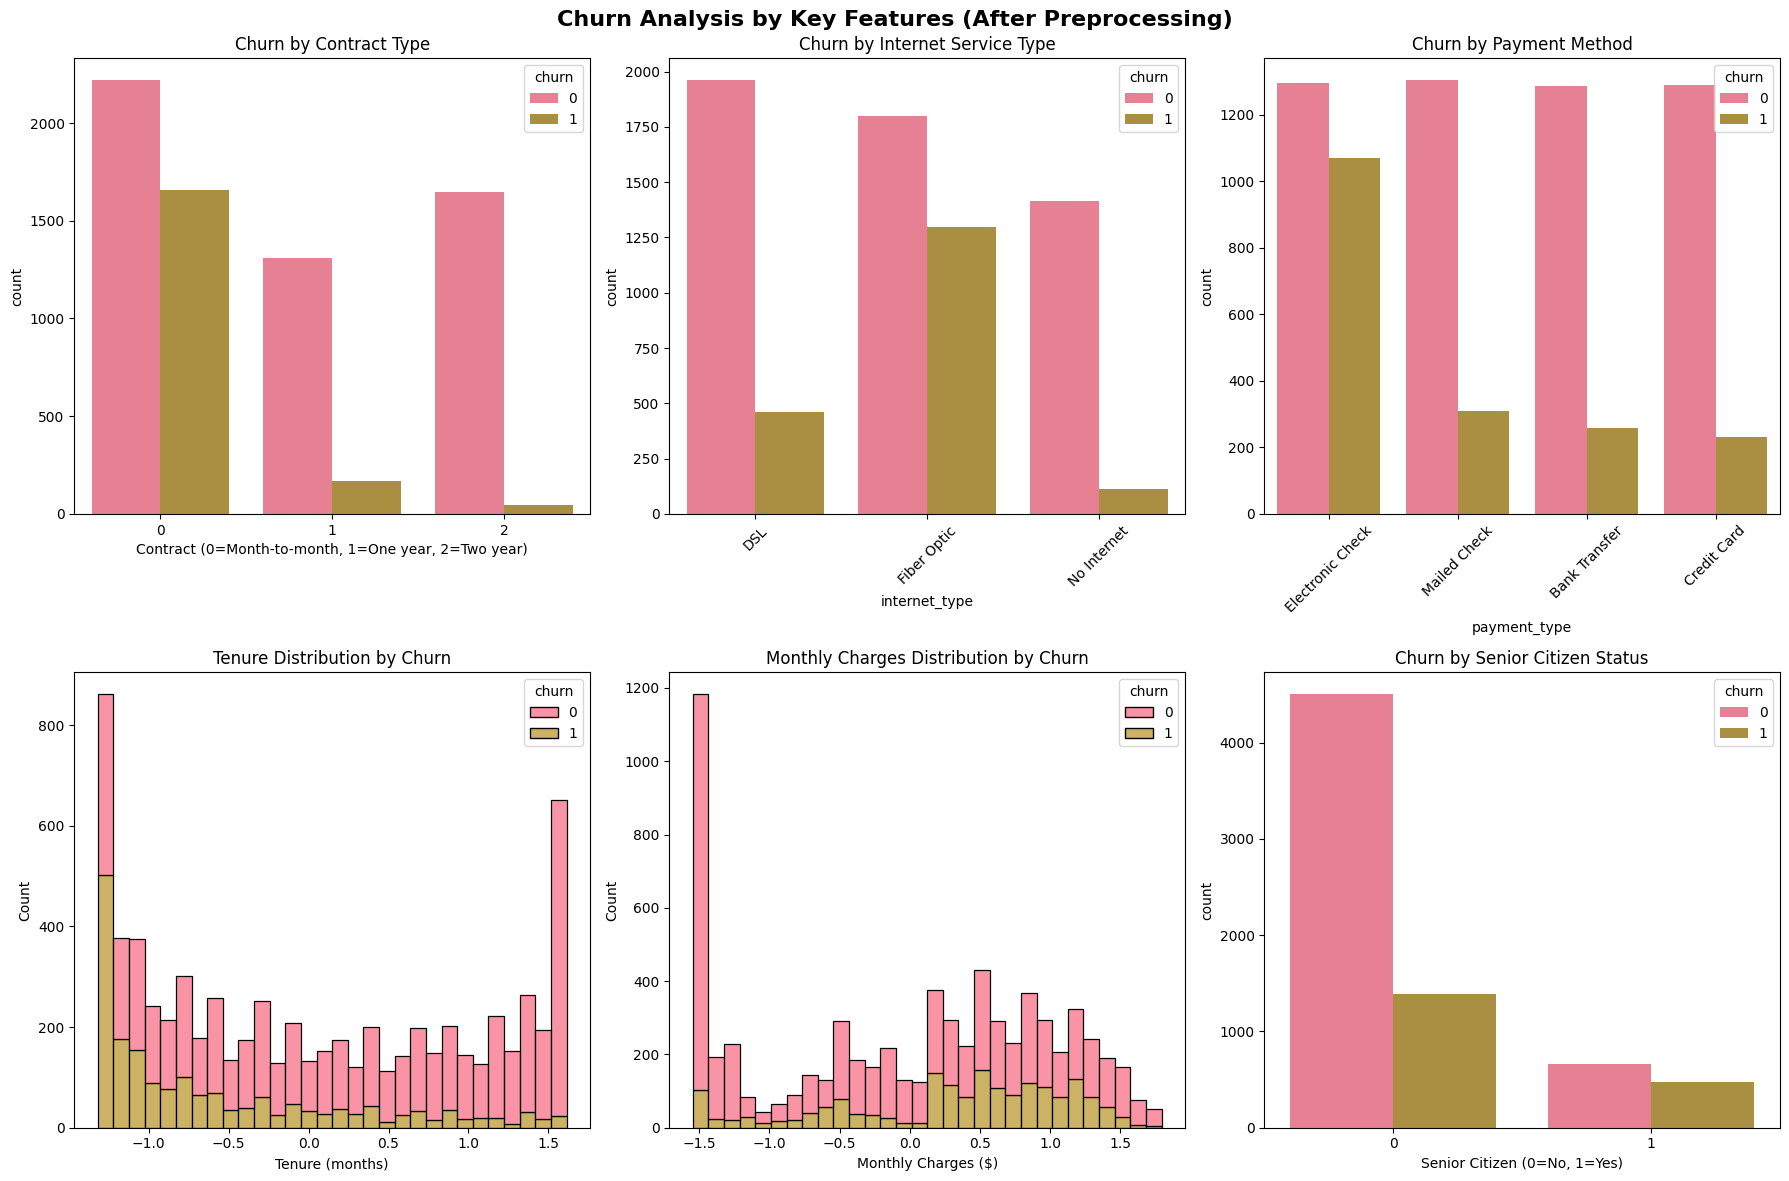


CORRELATION ANALYSIS
Top 10 features correlated with churn:
churn                       1.000
contract                   -0.397
tenure                     -0.352
internet_fiber_optic        0.308
payment_electronic_check    0.302
internet_no                -0.228
total_charges              -0.199
monthly_charges             0.193
paperless_billing           0.192
online_security            -0.171
tech_support               -0.165
Name: churn, dtype: float64


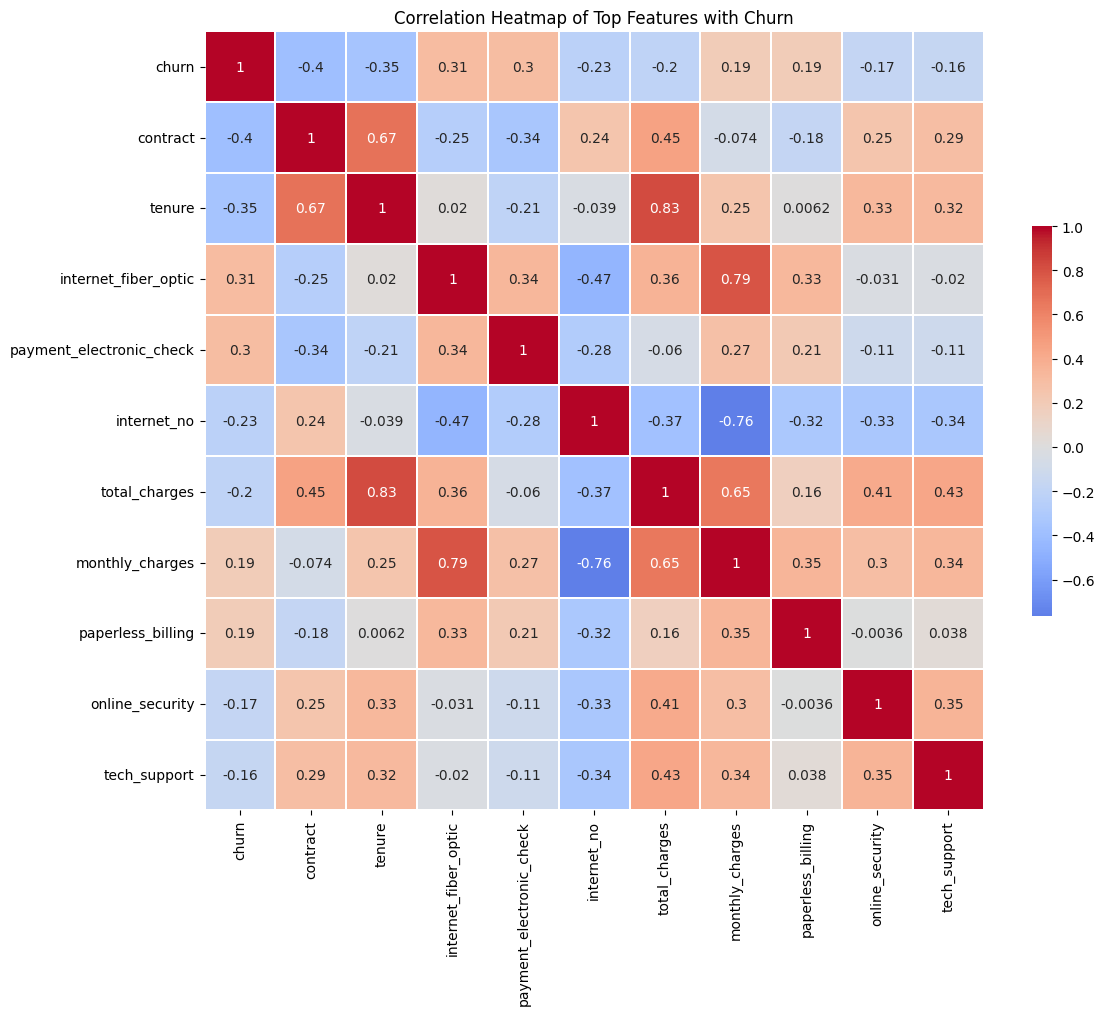


KEY INSIGHTS FROM EDA
Contract Analysis:
  - Month-to-month: 42.7% churn rate
  - One year: 11.3% churn rate
  - Two year: 2.8% churn rate

Internet Service Analysis:
  - DSL: 19.0% churn rate
  - Fiber Optic: 41.9% churn rate
  - No Internet: 7.4% churn rate

Tenure Analysis:
  - Short tenure (≤12 months): 26.5% churn rate
  - Long tenure (>12 months): nan% churn rate


In [208]:
# Perform initial EDA to understand the distribution of features and their relationship with the target variable after preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview
print("DATASET OVERVIEW AFTER PREPROCESSING")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Total customers: {len(df):,}")
print(f"Churn rate: {(df['churn'].sum() / len(df)) * 100:.1f}%")
print(f"Missing values: {df.isnull().sum().sum()}")

# 2. Feature Distribution Analysis
print("\nFEATURE DISTRIBUTION SUMMARY")
print("="*50)

# Continuous features
continuous_cols = ['tenure', 'monthly_charges', 'total_charges']
print("Continuous Features:")
print(df[continuous_cols].describe().round(2))

# Binary features summary
binary_cols = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 
               'multiple_lines', 'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

print(f"\nBinary Features (% of customers with feature = 1):")
for col in binary_cols:
    percentage = (df[col].sum() / len(df)) * 100
    print(f"{col}: {percentage:.1f}%")

# 3. Churn Analysis by Features
print("\nCHURN ANALYSIS BY KEY FEATURES")
print("="*50)

# Create subplots for churn analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis by Key Features (After Preprocessing)', fontsize=16, fontweight='bold')

# Contract vs Churn
sns.countplot(data=df, x='contract', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Contract Type')
axes[0,0].set_xlabel('Contract (0=Month-to-month, 1=One year, 2=Two year)')

# Internet Service vs Churn
internet_data = df[['internet_dsl', 'internet_fiber_optic', 'internet_no', 'churn']]
internet_type = []
for _, row in df.iterrows():
    if row['internet_dsl'] == 1:
        internet_type.append('DSL')
    elif row['internet_fiber_optic'] == 1:
        internet_type.append('Fiber Optic')
    else:
        internet_type.append('No Internet')

df_temp = df.copy()
df_temp['internet_type'] = internet_type
sns.countplot(data=df_temp, x='internet_type', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Internet Service Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
payment_type = []
payment_cols = ['payment_bank_transfer', 'payment_credit_card', 'payment_electronic_check', 'payment_mailed_check']
for _, row in df.iterrows():
    if row['payment_bank_transfer'] == 1:
        payment_type.append('Bank Transfer')
    elif row['payment_credit_card'] == 1:
        payment_type.append('Credit Card')
    elif row['payment_electronic_check'] == 1:
        payment_type.append('Electronic Check')
    else:
        payment_type.append('Mailed Check')

df_temp['payment_type'] = payment_type
sns.countplot(data=df_temp, x='payment_type', hue='churn', ax=axes[0,2])
axes[0,2].set_title('Churn by Payment Method')
axes[0,2].tick_params(axis='x', rotation=45)

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='churn', multiple='stack', bins=30, ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn')
axes[1,0].set_xlabel('Tenure (months)')

# Monthly charges distribution by churn
sns.histplot(data=df, x='monthly_charges', hue='churn', multiple='stack', bins=30, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges Distribution by Churn')
axes[1,1].set_xlabel('Monthly Charges ($)')

# Senior citizen vs churn
sns.countplot(data=df, x='senior_citizen', hue='churn', ax=axes[1,2])
axes[1,2].set_title('Churn by Senior Citizen Status')
axes[1,2].set_xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 4. Correlation Analysis
print("\nCORRELATION ANALYSIS")
print("="*50)

# Calculate correlation with churn
correlations = df.corr()['churn'].sort_values(key=abs, ascending=False)
print("Top 10 features correlated with churn:")
print(correlations.head(11).round(3))  # 11 to exclude churn itself

# Correlation heatmap for top features
top_features = correlations.head(11).index.tolist()
plt.figure(figsize=(12, 10))
correlation_matrix = df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.1, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Top Features with Churn')
plt.tight_layout()
plt.show()

# 5. Key Insights Summary
print("\nKEY INSIGHTS FROM EDA")
print("="*50)
churn_rate = (df['churn'].sum() / len(df)) * 100

# Contract insights
contract_churn = df.groupby('contract')['churn'].agg(['count', 'sum', 'mean'])
print(f"Contract Analysis:")
print(f"  - Month-to-month: {contract_churn.loc[0, 'mean']*100:.1f}% churn rate")
print(f"  - One year: {contract_churn.loc[1, 'mean']*100:.1f}% churn rate") 
print(f"  - Two year: {contract_churn.loc[2, 'mean']*100:.1f}% churn rate")

# Internet service insights
internet_churn_dsl = df[df['internet_dsl']==1]['churn'].mean()*100
internet_churn_fiber = df[df['internet_fiber_optic']==1]['churn'].mean()*100
internet_churn_no = df[df['internet_no']==1]['churn'].mean()*100
print(f"\nInternet Service Analysis:")
print(f"  - DSL: {internet_churn_dsl:.1f}% churn rate")
print(f"  - Fiber Optic: {internet_churn_fiber:.1f}% churn rate")
print(f"  - No Internet: {internet_churn_no:.1f}% churn rate")

# Tenure insights
short_tenure_churn = df[df['tenure'] <= 12]['churn'].mean()*100
long_tenure_churn = df[df['tenure'] > 12]['churn'].mean()*100
print(f"\nTenure Analysis:")
print(f"  - Short tenure (≤12 months): {short_tenure_churn:.1f}% churn rate")
print(f"  - Long tenure (>12 months): {long_tenure_churn:.1f}% churn rate")

### Split the dataset into training and testing sets (e.g., 70% train, 30% test) ensuring proper stratification for the Churn variable.

In [209]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the dataset: 70% train, 30% test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42, 
    stratify=y  # to ensure balanced churn distribution in both sets
)

# Display split information
print("Dataset Split Summary:")
print("="*50)
print(f"Total samples: {len(df):,}")
print(f"Training samples: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing samples: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nFeatures (X): {X.shape[1]} columns")
print(f"Target (y): churn")

# Verify stratification by checking churn distribution in train and test sets
print("\nChurn Distribution Verification:")
print("="*50)
print(f"Original dataset:")
print(f"  - Churn=0 (No): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

print(f"\nTraining set:")
print(f"  - Churn=0 (No): {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

print(f"\nTesting set:")
print(f"  - Churn=0 (No): {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

print("\n✓ So this way to have stratification which is to ensure both sets have similar churn proportions")

Dataset Split Summary:
Total samples: 7,043
Training samples: 4,930 (70.0%)
Testing samples: 2,113 (30.0%)

Features (X): 24 columns
Target (y): churn

Churn Distribution Verification:
Original dataset:
  - Churn=0 (No): 5174 (73.5%)
  - Churn=1 (Yes): 1869 (26.5%)

Training set:
  - Churn=0 (No): 3622 (73.5%)
  - Churn=1 (Yes): 1308 (26.5%)

Testing set:
  - Churn=0 (No): 1552 (73.5%)
  - Churn=1 (Yes): 561 (26.5%)

✓ So this way to have stratification which is to ensure both sets have similar churn proportions


# Part 3: Model Building and Training